# Libraries Required

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

# Import the Data

In [2]:
import pandas as pd
DF_Raw = pd.read_csv('Stroke_Dataset.csv' )

print(DF_Raw.describe())
print(DF_Raw.info())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

# Data Cleansing

In [3]:
# Lets remove "ID" column, it is unnecessary
DF_Raw.pop("id")

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [4]:
# # Lets get the average value for each of the columns, specifically "bmi"
DF_Raw.mean(axis=0)

age                   43.226614
hypertension           0.097456
heart_disease          0.054012
avg_glucose_level    106.147677
bmi                   28.893237
stroke                 0.048728
dtype: float64

In [5]:
# Lets replace the null values in bmi with the average of the column, 28.89
DF_Raw['bmi'] = DF_Raw['bmi'].fillna(28.89)
print(DF_Raw)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level    bmi   smo

# Insights

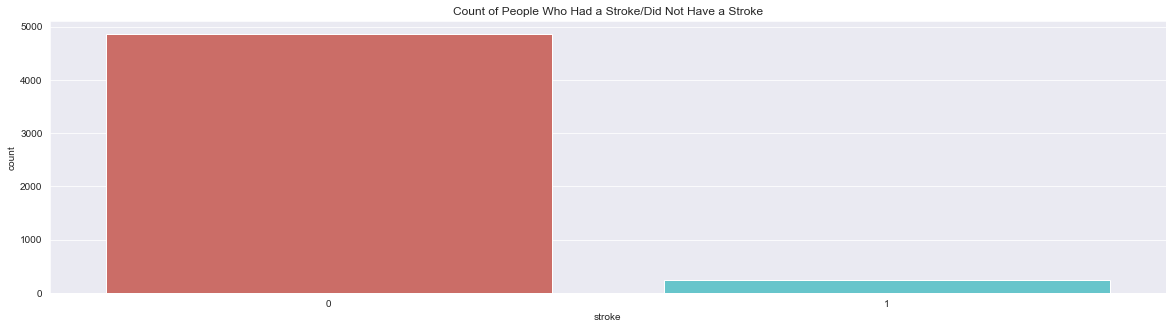

<Figure size 1440x360 with 0 Axes>

In [6]:
# Lets see a breakdown of stroke sufferers and people who have not had a stroke
sns.countplot(x='stroke', data=DF_Raw, palette='hls')
plt.title("Count of People Who Had a Stroke/Did Not Have a Stroke")
plt.show()
plt.savefig('new_count_plot')

In [7]:
# What % of people had a stroke and what % of people did not have a stroke?
count_no_stroke = len(DF_Raw[DF_Raw['stroke']==0])
count_stroke = len(DF_Raw[DF_Raw['stroke']==1])
pct_of_no_stroke = count_no_stroke/(count_no_stroke+count_stroke)
print("percentage of no stroke is", pct_of_no_stroke*100)
pct_of_stroke = count_stroke/(count_no_stroke+count_stroke)
print("percentage of had a stroke is", pct_of_stroke*100)

percentage of no stroke is 95.12720156555773
percentage of had a stroke is 4.87279843444227


Our classes are imbalanced, and the ratio of no-stroke to stroke instances is 95:5.

In [8]:
# Get names of indexes for which column Gender has value Other
indexNames = DF_Raw[ DF_Raw['gender'] == 'Other' ].index
# Delete these row indexes from dataFrame
DF_Raw.drop(indexNames , inplace=True)

DF_Raw['gender'].value_counts()
#The one row with "other" as gender is removed.

Female    2994
Male      2115
Name: gender, dtype: int64

Females represent 58.6% and Males represent 42.4% of our dataset.

In [9]:
# Lets see the averages of "age", "avg_glucose_level", and "bmi" grouped by "had a stroke", "did not have a stroke"
result = DF_Raw.groupby('stroke').agg({'age' : ['mean'],'avg_glucose_level' : ['mean'], 'bmi': ['mean'], })
  
print("Mean values of age, avg_glucose_level and bmi grouped by stroke")
print("---------------------------------------------------------------")
print(result)

Mean values of age, avg_glucose_level and bmi grouped by stroke
---------------------------------------------------------------
              age avg_glucose_level        bmi
             mean              mean       mean
stroke                                        
0       41.974831        104.787584  28.826603
1       67.728193        132.544739  30.217269


Observations: 1) Stroke Sufferers on average are much older (67.7 yrs old) 2) Stroke Sufferers on average has a glucose level 30% higher (132.54) than people who have not had a stroke. 3) The BMI values for both sides was pretty close whether you had a stroke or you did not have a stroke.

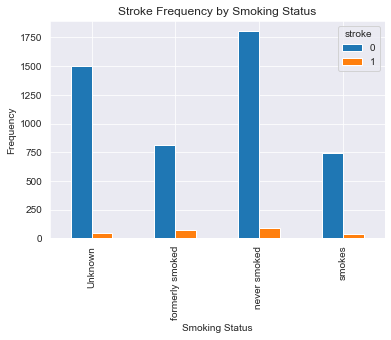

In [10]:
%matplotlib inline
pd.crosstab(DF_Raw.smoking_status,DF_Raw.stroke).plot(kind='bar')
plt.title('Stroke Frequency by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.savefig('New stroke_smoking')

Observations: 1) of the Non Stroke people, "Never Smoked" had the highest counts.  2) of the Stroke people, "Never Smoked" was also the highest count.  This seems odd given that one might expect a smoker to be much more to have a stroke than a non smoker.

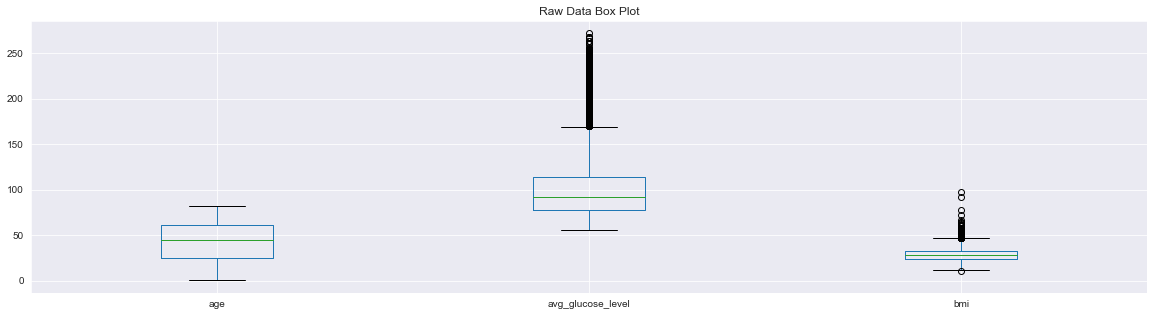

In [11]:
DF_Raw[['age', 'avg_glucose_level', 'bmi']].plot(kind='box', figsize=(20,5))
plt.title("Raw Data Box Plot")
plt.savefig('NEW raw data box plot')
plt.show()

Observations: 1) Avg_Glucose_Level had several outliers above the upper whisker. 2) BMI also had outliers above the upper whisker, but less than the # that Avg_Glucose_Level had.

In [12]:
Q1 = DF_Raw.quantile(.25)
Q3 = DF_Raw.quantile(.75)
IQR = Q3 - Q1
print(IQR)

age                  36.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    36.85
bmi                   9.00
stroke                0.00
dtype: float64


In [13]:
Lower_Limit = Q1 - 1.5*IQR
Upper_Limit = Q3 + 1.5*IQR
Outliers = DF_Raw[((DF_Raw < Lower_Limit) | ((DF_Raw > Upper_Limit))).any(axis=1)]
print(Outliers)
print(Outliers.count())
percent_of_outliers = Outliers.count()/DF_Raw.count()
print(percent_of_outliers)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5091    Male  59.0             1              0          Yes        Private   
5093  Female  45.0             1              0          Yes       Govt_job   
5100    Male  82.0             1              0          Yes  Self-employed   
5103  Female  18.0             0              0           No        Private   
5105  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level    bmi   smo

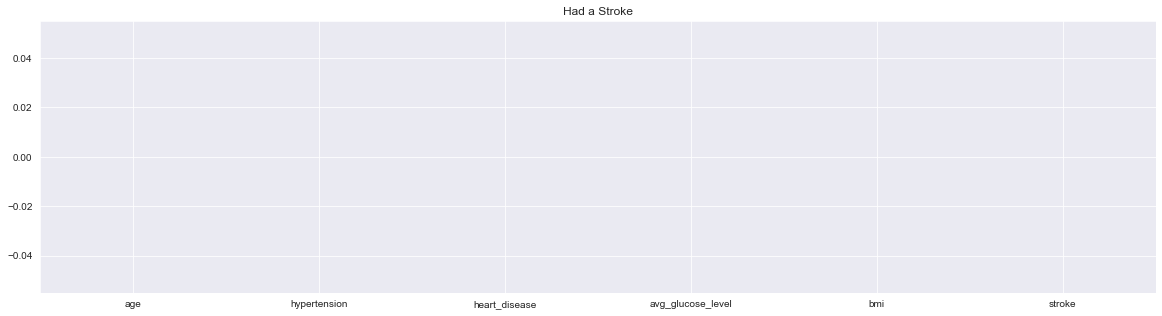

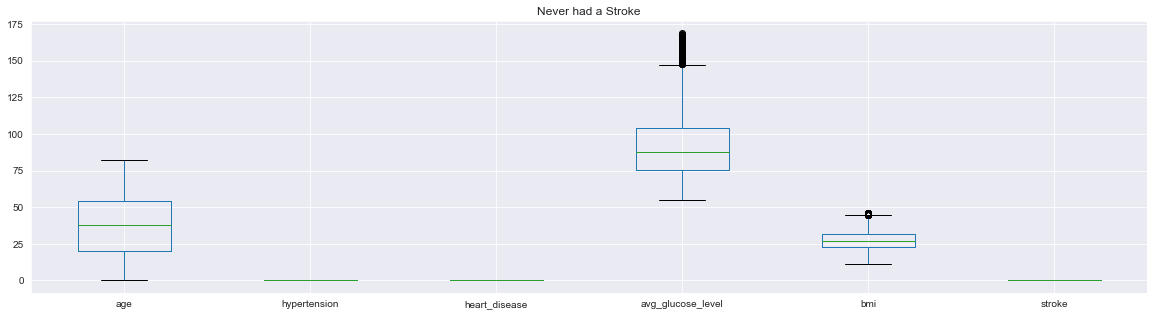

In [14]:
Outliers_Removed = DF_Raw[~((DF_Raw < Lower_Limit) | ((DF_Raw > Upper_Limit))).any(axis=1)]

condition_1 = Outliers_Removed['stroke']==1
Outliers_Removed[condition_1].plot(kind='box', figsize=(20,5))
plt.title("Had a Stroke")
plt.show()

condition_0 = Outliers_Removed['stroke']==0
Outliers_Removed[condition_0].plot(kind='box',figsize=(20,5) )
plt.title("Never had a Stroke")
plt.savefig('NEW outliers removed')
plt.show()

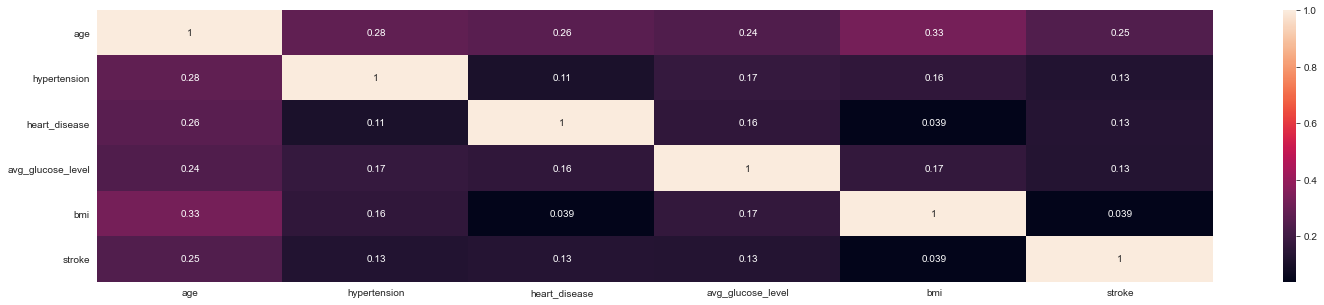

In [15]:
corrrelation    = DF_Raw.corr(method="pearson")

plt.subplots(figsize=(25,5))
sns.heatmap(corrrelation, annot=True)
plt.savefig('NEW correlation heat map')
plt.show()

Observations: 1) We really do not see nay strong positive correlations.  The highest correlation occurs between bmi/age at .33.  2) The highest correlation for having a stroke is with age (.25) which would make sense.  Clearly, the older you get, one would probable guess that your likelihood of having a stroke would increase.

In [16]:
DF_Raw.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325851,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160140,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038854,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168902,0.131991
bmi,0.325851,0.160140,0.038854,0.168902,1.000000,0.038901
stroke,0.245239,0.127891,0.134905,0.131991,0.038901,1.000000


In [17]:
independent_variables = DF_Raw[['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
                              'bmi']]
independent_variables = sm.add_constant(independent_variables)
dependent_variable = DF_Raw["stroke"]
#print(dependent_variable)
regression_model = sm.OLS(dependent_variable,independent_variables).fit() 
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     83.29
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           2.36e-84
Time:                        14:58:37   Log-Likelihood:                 796.61
No. Observations:                5109   AIC:                            -1581.
Df Residuals:                    5103   BIC:                            -1542.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0379      0.01

Observations: 1) This particular Ordinary Least Squares study has a very low R squared of 0.075, indicative of our independent variables not doing much to influence the dependent variable.

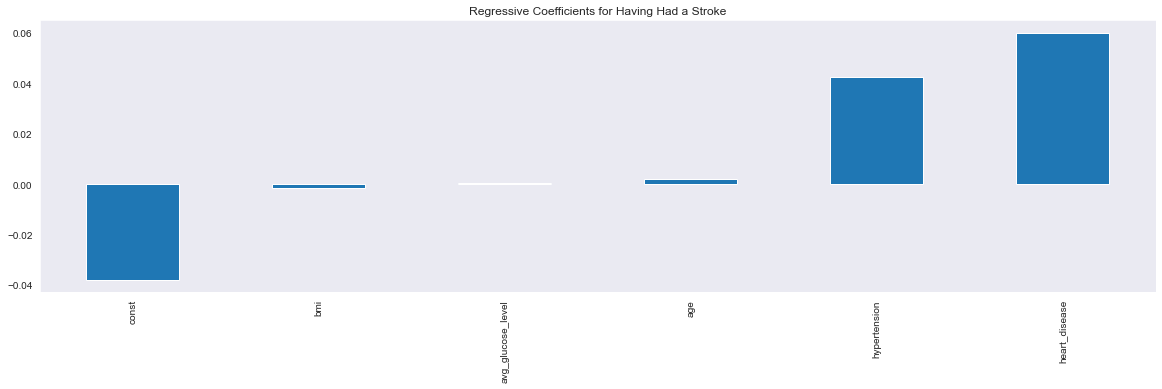

In [18]:
regression_model.params.sort_values(ascending=True).plot(kind='bar', figsize=(20,5))
plt.title("Regressive Coefficients for Having Had a Stroke")
plt.grid()
plt.savefig('NEW OLS Regression Bar Chart')
plt.show()

In [19]:
#Lets create dummy variables for gender
gender_dummies = pd.get_dummies(DF_Raw.gender, prefix='Gender').iloc[:, 1:]

In [20]:
#Lets create dummy variables for Residence_type
Residence_type_dummies = pd.get_dummies(DF_Raw.Residence_type, prefix='Residence').iloc[:, 1:]

In [21]:
#Lets create dummy variables for ever_married
ever_marrried_dummies = pd.get_dummies(DF_Raw.ever_married, prefix='Ever Married').iloc[:, 1:]

In [23]:
#Lets create dummy variables for smoking_status
smoking_status_dummies = pd.get_dummies(DF_Raw.smoking_status, prefix='Smoking Status').iloc[:, 1:]

In [24]:
#Lets create dummy variables for work_type
work_type_dummies = pd.get_dummies(DF_Raw.work_type, prefix='Work Type').iloc[:, 1:]

In [25]:
DF_Raw_New = pd.concat([DF_Raw, gender_dummies, Residence_type_dummies, ever_marrried_dummies, smoking_status_dummies, 
                       work_type_dummies], axis=1)

In [26]:
print(DF_Raw_New.head(10))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   
6    Male  74.0             1              1          Yes        Private   
7  Female  69.0             0              0           No        Private   
8  Female  59.0             0              0          Yes        Private   
9  Female  78.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level    bmi   smoking_status  ...  Gender_Male  \
0          Urban             228.69  36.60  formerly smoked  ...            1   
1

In [33]:
#DF_Raw_New.pop("gender") 
#DF_Raw_New.pop("smoking_status") 
#DF_Raw_New.pop("ever_married") 
#DF_Raw_New.pop("Residence_type") 
#DF_Raw_New.pop("work_type")


In [34]:
DF_Raw_New.columns   

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Gender_Male', 'Residence_Urban', 'Ever Married_Yes',
       'Smoking Status_formerly smoked', 'Smoking Status_never smoked',
       'Smoking Status_smokes', 'Work Type_Never_worked', 'Work Type_Private',
       'Work Type_Self-employed', 'Work Type_children'],
      dtype='object')

In [35]:
DF_Raw_New.head(15)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Gender_Male,Residence_Urban,Ever Married_Yes,Smoking Status_formerly smoked,Smoking Status_never smoked,Smoking Status_smokes,Work Type_Never_worked,Work Type_Private,Work Type_Self-employed,Work Type_children
0,67.0,0,1,228.69,36.60,1,1,1,1,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.89,1,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50,1,1,0,1,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.40,1,0,1,1,0,0,1,0,1,0,0
4,79.0,1,0,174.12,24.00,1,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.00,1,1,1,1,1,0,0,0,1,0,0
6,74.0,1,1,70.09,27.40,1,1,0,1,0,1,0,0,1,0,0
7,69.0,0,0,94.39,22.80,1,0,1,0,0,1,0,0,1,0,0
8,59.0,0,0,76.15,28.89,1,0,0,1,0,0,0,0,1,0,0
9,78.0,0,0,58.57,24.20,1,0,1,1,0,0,0,0,1,0,0


Because our dataset is so improperly balances 95 (no stroke) : 5 (had stroke), lets do SMOTE to get a more balanced set.

In [36]:
!pip install imblearn

In [37]:
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
X = DF_Raw_New.loc[:, DF_Raw_New.columns != 'stroke']
y = DF_Raw_New.loc[:, DF_Raw_New.columns == 'stroke']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data= os_data_X, columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['stroke'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no strokes in oversampled data",len(os_data_y[os_data_y['stroke']==0]))
print("Number of strokes",len(os_data_y[os_data_y['stroke']==1]))
print("Proportion of no strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==0])/len(os_data_X))
print("Proportion of strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==1])/len(os_data_X))

length of oversampled data is  7294
Number of no strokes in oversampled data 3647
Number of strokes 3647
Proportion of no strokes data in oversampled data is  0.5
Proportion of strokes data in oversampled data is  0.5


In [46]:
X = os_data_X.loc[:, os_data_X.columns != 'stroke']
y = os_data_y.loc[:, os_data_y.columns == 'stroke']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.320462
         Iterations: 35
                                     Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.538    
Dependent Variable:          stroke                   AIC:                      4704.8939
Date:                        2021-06-14 15:17         BIC:                      4808.3160
No. Observations:            7294                     Log-Likelihood:           -2337.4  
Df Model:                    14                       LL-Null:                  -5055.8  
Df Residuals:                7279                     LLR p-value:              0.0000   
Converged:                   0.0000                   Scale:                    1.0000   
No. Iterations:              35.0000                                                     
-----------------------------------------------------------------------------------------
                                Coef.    Std.Err.     z     P>|z|     [0

C:\Users\rvaug\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We have 2 P Values that need to be removed (one at a time).  We will then rerun our Regression.

In [54]:
DF_Raw_New.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Gender_Male', 'Residence_Urban', 'Ever Married_Yes',
       'Smoking Status_formerly smoked', 'Smoking Status_never smoked',
       'Smoking Status_smokes', 'Work Type_Never_worked', 'Work Type_Private',
       'Work Type_Self-employed', 'Work Type_children'],
      dtype='object')

In [58]:
DF_Raw_New = DF_Raw_New.drop("Work Type_Never_worked", axis=1)

In [59]:
DF_Raw_New.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Gender_Male', 'Residence_Urban', 'Ever Married_Yes',
       'Smoking Status_formerly smoked', 'Smoking Status_never smoked',
       'Smoking Status_smokes', 'Work Type_Private', 'Work Type_Self-employed',
       'Work Type_children'],
      dtype='object')

In [62]:
X = DF_Raw_New.loc[:, DF_Raw_New.columns != 'stroke']
y = DF_Raw_New.loc[:, DF_Raw_New.columns == 'stroke']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data= os_data_X, columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['stroke'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no strokes in oversampled data",len(os_data_y[os_data_y['stroke']==0]))
print("Number of strokes",len(os_data_y[os_data_y['stroke']==1]))
print("Proportion of no strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==0])/len(os_data_X))
print("Proportion of strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==1])/len(os_data_X))

length of oversampled data is  7294
Number of no strokes in oversampled data 3647
Number of strokes 3647
Proportion of no strokes data in oversampled data is  0.5
Proportion of strokes data in oversampled data is  0.5


In [63]:
X = os_data_X.loc[:, os_data_X.columns != 'stroke']
y = os_data_y.loc[:, os_data_y.columns == 'stroke']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.320889
         Iterations: 35
                                     Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.537    
Dependent Variable:          stroke                   AIC:                      4709.1290
Date:                        2021-06-14 15:33         BIC:                      4805.6563
No. Observations:            7294                     Log-Likelihood:           -2340.6  
Df Model:                    13                       LL-Null:                  -5055.8  
Df Residuals:                7280                     LLR p-value:              0.0000   
Converged:                   0.0000                   Scale:                    1.0000   
No. Iterations:              35.0000                                                     
-----------------------------------------------------------------------------------------
                                Coef.    Std.Err.     z     P>|z|     [0

C:\Users\rvaug\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Our 1st bad P Value "Work Type_Never_worked" is removed.  Now lets get rid of "Work Type_children" and rerun our Regression.

In [64]:
DF_Raw_New = DF_Raw_New.drop("Work Type_children", axis=1)

In [65]:
DF_Raw_New.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Gender_Male', 'Residence_Urban', 'Ever Married_Yes',
       'Smoking Status_formerly smoked', 'Smoking Status_never smoked',
       'Smoking Status_smokes', 'Work Type_Private',
       'Work Type_Self-employed'],
      dtype='object')

In [66]:
X = DF_Raw_New.loc[:, DF_Raw_New.columns != 'stroke']
y = DF_Raw_New.loc[:, DF_Raw_New.columns == 'stroke']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data= os_data_X, columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['stroke'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no strokes in oversampled data",len(os_data_y[os_data_y['stroke']==0]))
print("Number of strokes",len(os_data_y[os_data_y['stroke']==1]))
print("Proportion of no strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==0])/len(os_data_X))
print("Proportion of strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==1])/len(os_data_X))

length of oversampled data is  7294
Number of no strokes in oversampled data 3647
Number of strokes 3647
Proportion of no strokes data in oversampled data is  0.5
Proportion of strokes data in oversampled data is  0.5


In [67]:
X = os_data_X.loc[:, os_data_X.columns != 'stroke']
y = os_data_y.loc[:, os_data_y.columns == 'stroke']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.340588
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.509    
Dependent Variable:      stroke                AIC:                   4994.4925
Date:                    2021-06-14 15:39      BIC:                   5084.1250
No. Observations:        7294                  Log-Likelihood:        -2484.2  
Df Model:                12                    LL-Null:               -5055.8  
Df Residuals:            7281                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

"Heart Disease" still has an unacceptable P Value of .0885.  Get rid of it and redo Regression.

In [68]:
DF_Raw_New = DF_Raw_New.drop("heart_disease", axis=1)

In [69]:
DF_Raw_New.columns

Index(['age', 'hypertension', 'avg_glucose_level', 'bmi', 'stroke',
       'Gender_Male', 'Residence_Urban', 'Ever Married_Yes',
       'Smoking Status_formerly smoked', 'Smoking Status_never smoked',
       'Smoking Status_smokes', 'Work Type_Private',
       'Work Type_Self-employed'],
      dtype='object')

In [70]:
X = DF_Raw_New.loc[:, DF_Raw_New.columns != 'stroke']
y = DF_Raw_New.loc[:, DF_Raw_New.columns == 'stroke']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data= os_data_X, columns=columns )

os_data_y= pd.DataFrame(data=os_data_y,columns=['stroke'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no strokes in oversampled data",len(os_data_y[os_data_y['stroke']==0]))
print("Number of strokes",len(os_data_y[os_data_y['stroke']==1]))
print("Proportion of no strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==0])/len(os_data_X))
print("Proportion of strokes data in oversampled data is ",len(os_data_y[os_data_y['stroke']==1])/len(os_data_X))

length of oversampled data is  7294
Number of no strokes in oversampled data 3647
Number of strokes 3647
Proportion of no strokes data in oversampled data is  0.5
Proportion of strokes data in oversampled data is  0.5


In [71]:
X = os_data_X.loc[:, os_data_X.columns != 'stroke']
y = os_data_y.loc[:, os_data_y.columns == 'stroke']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.340716
         Iterations 7
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.508    
Dependent Variable:      stroke                AIC:                   4994.3652
Date:                    2021-06-14 15:41      BIC:                   5077.1028
No. Observations:        7294                  Log-Likelihood:        -2485.2  
Df Model:                11                    LL-Null:               -5055.8  
Df Residuals:            7282                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

Now, all of our P Values are below .05.

Observations: 1) Our R squared is now .508, roughly 50.8% of our data fits the model.

Now, all of our P Values are below .05.

In [74]:
DF_Raw_New.to_csv('DF_Raw_New_Cleansed.csv')